### Problem Statement: Predicting Graduate Admission Chances for Indian Students

Jamboree, a renowned educational institution, has been instrumental in helping students achieve success in top colleges abroad through their specialized preparation for exams like GMAT, GRE, and SAT. Recently, they launched a feature on their website to estimate the probability of Indian students gaining admission to Ivy League colleges for graduate programs. This feature aims to predict the likelihood of admission based on a variety of factors that influence graduate admissions.

The goal of this case study is to analyze the dataset provided by Jamboree to understand the key factors influencing graduate admissions and their interrelationships. By identifying and analyzing the most significant variables in the admissions process, we aim to develop a predictive model that estimates the chances of a student being admitted to an Ivy League college based on their profile.

### Dataset Overview:
The dataset, **jamboree_admission.csv**, contains the following columns:

1. **Serial No.**: Unique identifier for each row.
2. **GRE Scores**: Graduate Record Examination scores (out of 340).
3. **TOEFL Scores**: Test of English as a Foreign Language scores (out of 120).
4. **University Rating**: Rating of the university (out of 5).
5. **Statement of Purpose and Letter of Recommendation Strength**: Combined strength of the student's SOP and LOR (out of 5).
6. **Undergraduate GPA**: Grade Point Average of the student's undergraduate degree (out of 10).
7. **Research Experience**: Binary variable indicating whether the student has research experience (0 = No, 1 = Yes).
8. **Chance of Admit**: Probability of the student being admitted to the graduate program (ranging from 0 to 1).

### Objectives:
1. **Exploratory Data Analysis (EDA)**: Investigate the relationships between the features and the target variable (Chance of Admit). Identify patterns, trends, and outliers.
2. **Feature Importance**: Determine which features have the most significant impact on the chances of admission. This will help prioritize areas for improvement in students' profiles.
3. **Model Development**: Build a predictive model that can accurately estimate the chance of admission to Ivy League graduate programs based on the given student profile.
4. **Insights and Recommendations**: Provide actionable insights for students to enhance their profiles based on the analysis, improving their chances of admission to top-tier graduate programs.

### Problem Statement:
Given the data on GRE scores, TOEFL scores, university ratings, SOP/LOR strength, undergraduate GPA, and research experience, the objective is to predict the **Chance of Admit** for Indian students applying to Ivy League graduate programs. This analysis will help Jamboree enhance its feature by providing accurate predictions and insights into the admissions process, ultimately aiding students in improving their profiles for better chances of success.

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 35.3MB/s]


# Load Data and non graphical analysis

In [ ]:
import pandas as pd
df = pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Graphical analysis

**Univariate**

Distribution plots for continuous variables

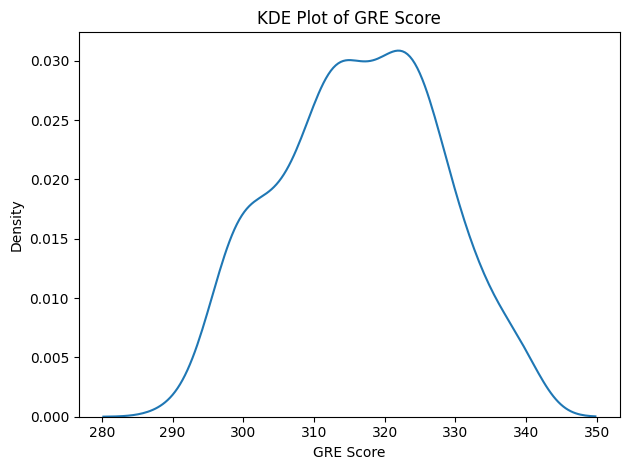

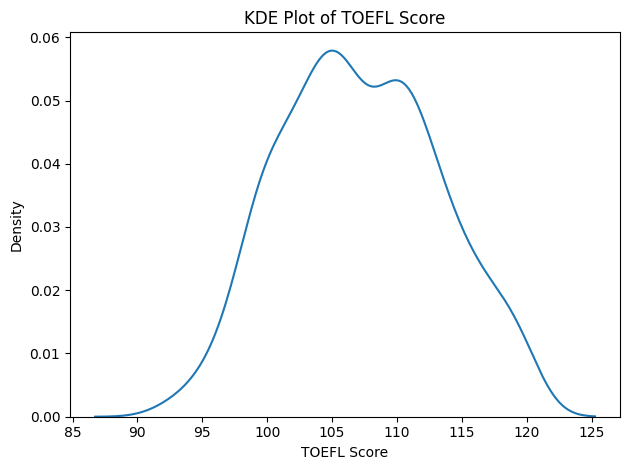

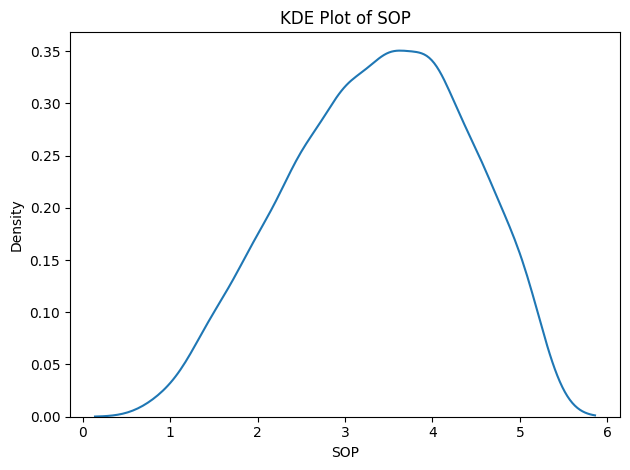

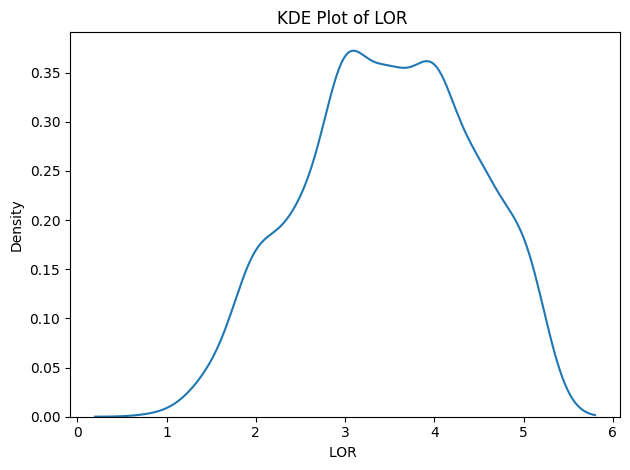

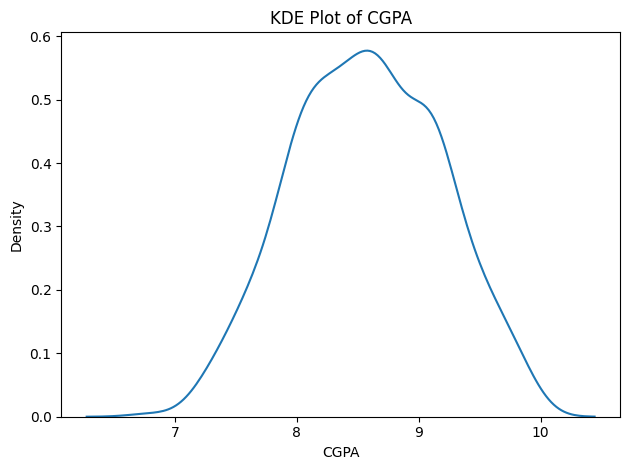

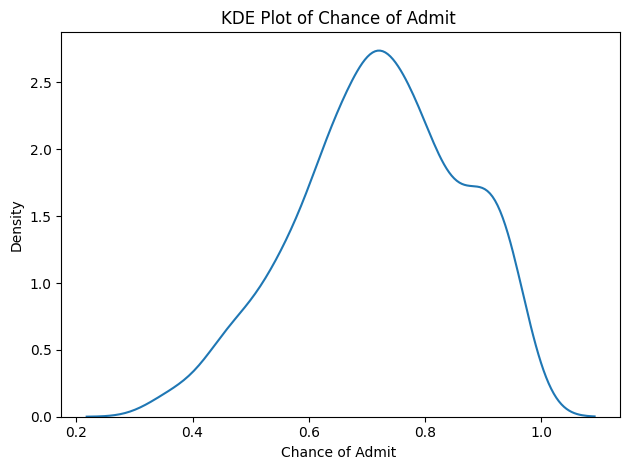

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of the columns you want to plot
continueous_columns = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA','Chance of Admit ']

# Loop through the columns and create a KDE plot for each
for column in continueous_columns:
    sns.kdeplot(df[column])
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


Barplots/Countplots for categorical variables

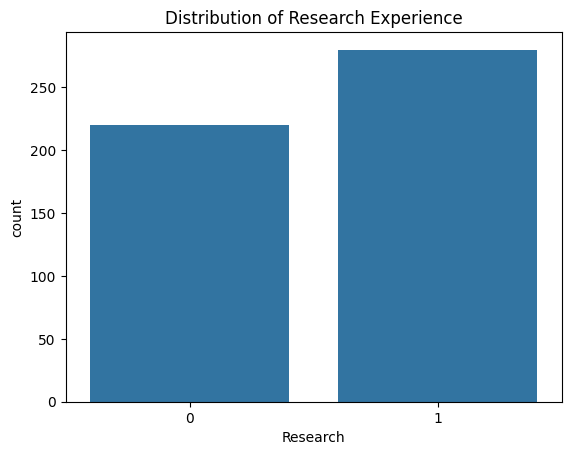

In [ ]:
sns.countplot(x='Research', data=df)
plt.title('Distribution of Research Experience')
plt.show()

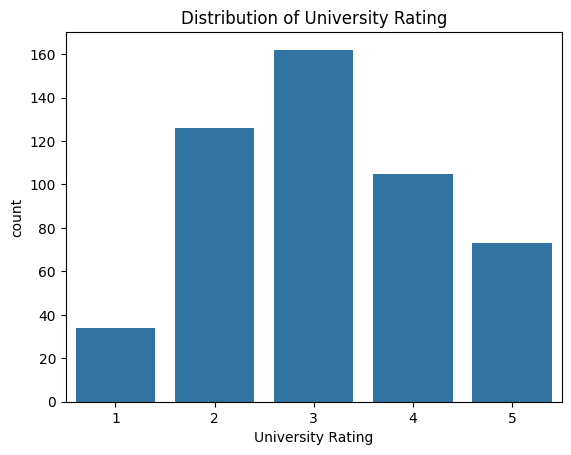

In [ ]:
sns.countplot(x='University Rating', data=df)
plt.title('Distribution of University Rating')
plt.show()

**Bivariate analysis**

correlation matrix for continuous variables using Heatmap

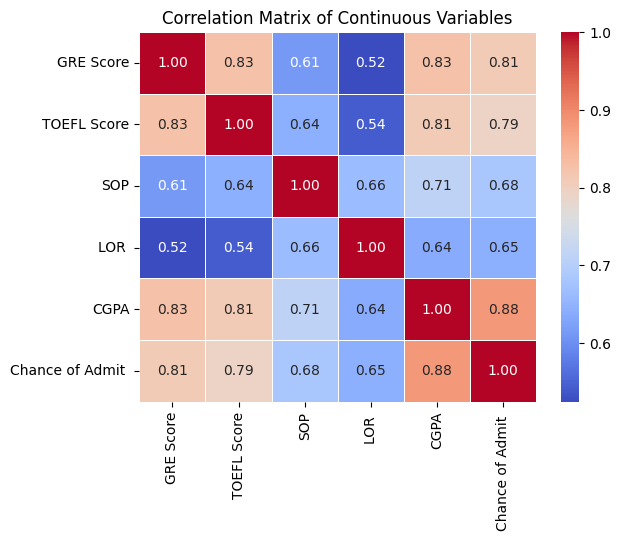

In [ ]:
sns.heatmap(df[continueous_columns].corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

**Strong correlation**
* CGPA has the strongest positive correlation with Chance of Admit (0.88), indicating that higher CGPA is closely associated with a higher probability of admission.
* GRE Score and TOEFL Score are also strongly correlated with Chance of Admit, with correlation values of 0.81 and 0.79, respectively.
* GRE Score and CGPA have a high correlation (0.83), suggesting that students with higher GRE scores tend to also have higher GPAs.

**Moderate correlation**
* SOP (Statement of Purpose) and LOR (Letter of Recommendation Strength) have moderate correlations with Chance of Admit (0.68 and 0.65, respectively). Although these factors are relevant, they are not as impactful as GRE, TOEFL, and CGPA.
* SOP is moderately correlated with CGPA (0.71), indicating a connection between a strong statement of purpose and academic performance.

**Weak correlation**
* LOR has weaker correlations with GRE, TOEFL, and CGPA, showing it is less directly tied to academic scores compared to other variables.

Scatterplots to see relationships between important variables (Chance of Admit vs. GRE Scores, TOEFL Scores, GPA)

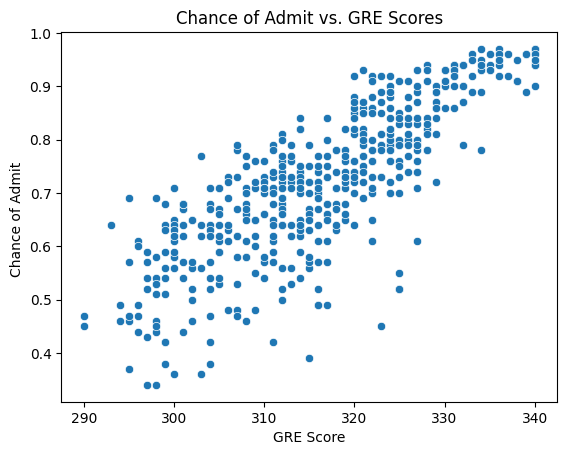

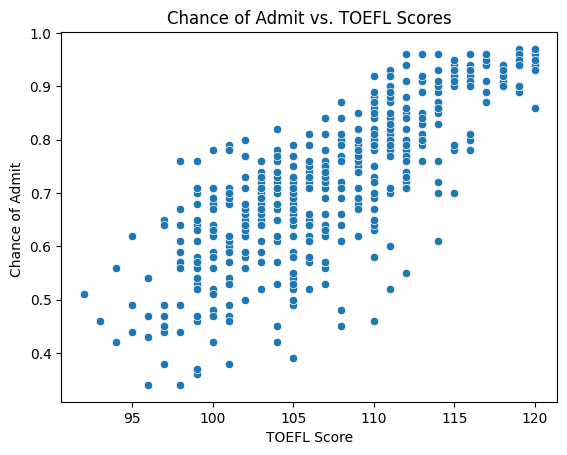

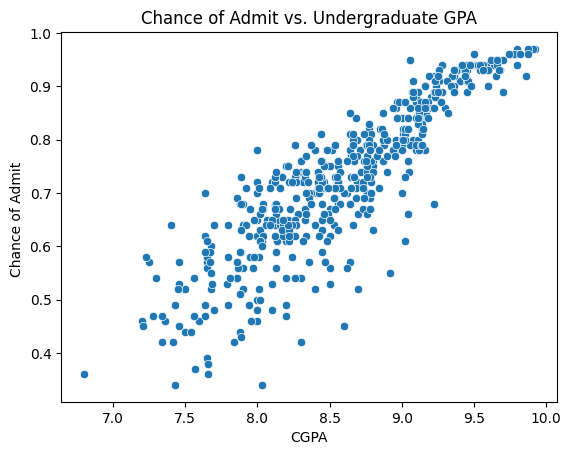

In [ ]:
sns.scatterplot(x='GRE Score', y='Chance of Admit ', data=df)
plt.title('Chance of Admit vs. GRE Scores')
plt.show()

sns.scatterplot(x='TOEFL Score', y='Chance of Admit ', data=df)
plt.title('Chance of Admit vs. TOEFL Scores')
plt.show()

sns.scatterplot(x='CGPA', y='Chance of Admit ', data=df)
plt.title('Chance of Admit vs. Undergraduate GPA')
plt.show()

GRE score, TOEFL score, CGPA have possitive correlation with Chance of Admit. That means more the batter.

visualisation of outliers using boxplot

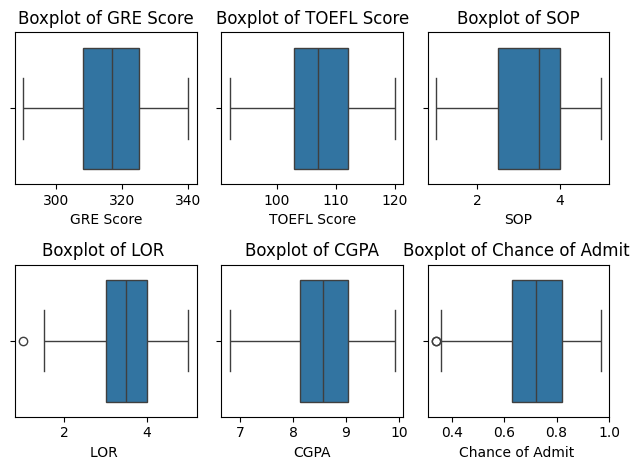

In [ ]:
for i, var in enumerate(continueous_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    plt.tight_layout()
plt.show()

**Removing unneeded column**

In [ ]:
df.drop('Serial No.',axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Drop duplicate**

In [ ]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
if duplicate_rows.shape[0] > 0:
    # Dropping duplicates if any
    data = df.drop_duplicates()
    print("Duplicates removed.")

Number of duplicate rows: 0


Handling Null values

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())
df.fillna(df.mean(), inplace=True)


Missing Values:
 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


Split data

In [ ]:
from sklearn.model_selection import train_test_split

X = df[df.columns.drop('Chance of Admit ')]
y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train=\n",X_train)
print("y_train=\n",y_train)
print("X_test=\n",X_test)
print("y_test=\n",y_test)

X_train=
      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
249        321          111                  3  3.5   4.0  8.83         1
433        316          111                  4  4.0   5.0  8.54         0
19         303          102                  3  3.5   3.0  8.50         0
322        314          107                  2  2.5   4.0  8.27         0
332        308          106                  3  3.5   2.5  8.21         1
..         ...          ...                ...  ...   ...   ...       ...
106        329          111                  4  4.5   4.5  9.18         1
270        306          105                  2  2.5   3.0  8.22         1
348        302           99                  1  2.0   2.0  7.25         0
435        309          105                  2  2.5   4.0  7.68         0
102        314          106                  2  4.0   3.5  8.25         0

[400 rows x 7 columns]
y_train=
 249    0.77
433    0.71
19     0.62
322    0.72
332    0.75
       .

#Simple linear regression in statsmodels

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          3.41e-142
Time:                        12:47:06   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.441      0.0

# Check assumptions of Linear Regression

**Multi collinearity check**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.65
0,GRE Score,4.49
1,TOEFL Score,3.66
3,SOP,2.79
2,University Rating,2.57
4,LOR,1.98
6,Research,1.52


In [ ]:
vif_thr = 5
r2_thr = 0.85
i = 0
feats_removed = []
cols=X_t.columns
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols]
  vif['Features'] = cols
  vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols = vif["Features"][1:].values
  X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model_ = sm.OLS(list(y_train), X2_sm).fit()
  if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model_.rsquared_adj < r2_thr):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model_.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])
  i += 1
print(f"{i} feature are removed due to multicollinearity")

Reached threshold
Highest vif: Features    CGPA
VIF         4.65
Name: 5, dtype: object
Current adj.R2 0.7677886218164505
Features removed: 0
List of features removed: []
0 feature are removed due to multicollinearity


Normality of residual check

Text(0.5, 1.0, 'Histogram of residuals')

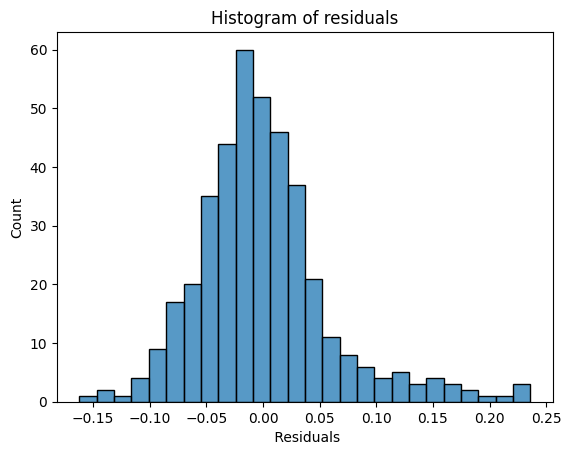

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [ ]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic

0.9291008662710202

Shapiro test passed proving normality

Mean of residuals

In [ ]:
import numpy as np
print(np.round(errors.mean(),2))

0.0


**Heteroskedasticity should not exist**

scatter plot: predictions vs residuals

Text(0.5, 1.0, 'Predicted values vs Residuals')

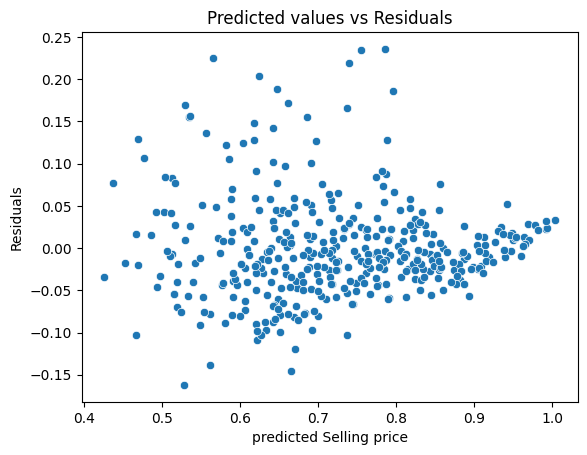

In [ ]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

from left to right residual seem to be constant though there are thicker (but sparse) spread in the middle.

Using Goldfeld Quandt Test to check homoskedacity

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
result=dict(lzip(name, test))
significant_level=0.05
if result['p-value']<significant_level:
  print('Null hypothesis rejected \ni.e evidence of heteroscedasticity')
else:
  print('Null hypothesis accepted \ni.e we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.')

Null hypothesis accepted 
i.e we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.


# Polynomial regression

In [ ]:
def adj_r2(X, y, r2_score):
  return 1 - ((1-r2_score)*(len(y)-1))/(len(y)-X.shape[1]-1)

In [ ]:
import sys

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

degrees = 11 # number of data-points
train_scores = []
test_scores = []

train_loss = []
test_loss = []

scaler = StandardScaler()

for degree in range(1, degrees):

    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)

    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)

    train_scores.append(adj_r2(X_train,y_train,train_score))
    test_scores.append(adj_r2(X_test,y_test,test_score))

    output1 = polyreg_scaled.predict(X_train)
    output2 = polyreg_scaled.predict(X_test)

    train_loss.append(mean_squared_error(y_train,output1))
    test_loss.append(mean_squared_error(y_test,output2))

    #draw a loading bar
    total_length=20
    filled_length = int(total_length * (degree+1) // degrees)
    bar = '#' * filled_length + '-' * (total_length - filled_length)
    sys.stdout.write(f'\rtraining: |{bar}| {(degree+1) / degrees:.0%}')
    sys.stdout.flush()

print("\n")

training: |####################| 100%



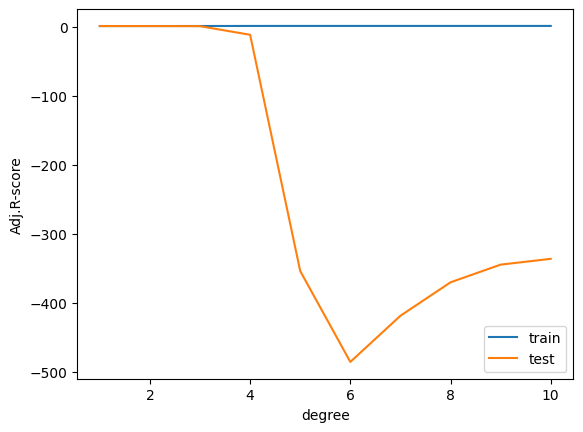

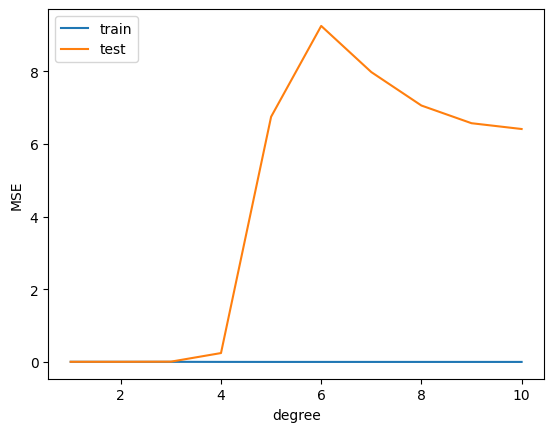

In [ ]:
plt.plot(list(range(1, 11)), train_scores, label="train")
plt.plot(list(range(1, 11)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("Adj.R-score")
plt.show()

plt.plot(list(range(1, 11)), train_loss, label="train")
plt.plot(list(range(1, 11)), test_loss, label="test")
plt.legend(loc='upper left')
plt.xlabel("degree")
plt.ylabel("MSE")
plt.show()

There seems to be no significant improvement by increasing the degree, instead it is overfitting.

# L1 (Lasso) regularization

In [ ]:
from sklearn.linear_model import Lasso

train_scores = []
test_scores = []
rate_list = [0.01, 0.1, 1,5, 10]
scaler = StandardScaler()
for rate in rate_list:
  polyreg_scaled = make_pipeline(scaler, Lasso(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  test_score= adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
  train_scores.append(train_score)
  test_scores.append(test_score)

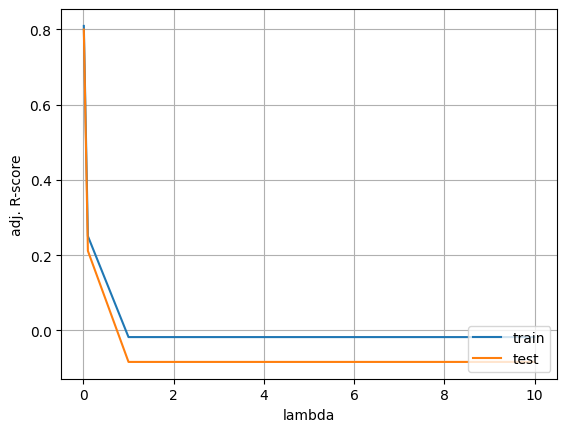

In [ ]:
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

0 is the optimum value of alpha

# L2 (Ridge) regularization

In [ ]:
from sklearn.linear_model import Ridge

train_scores = []
test_scores = []
rate_list = [0.01, 0.1, 1,5, 10]
scaler = StandardScaler()
for rate in rate_list:
  polyreg_scaled = make_pipeline(scaler, Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  test_score= adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
  train_scores.append(train_score)
  test_scores.append(test_score)

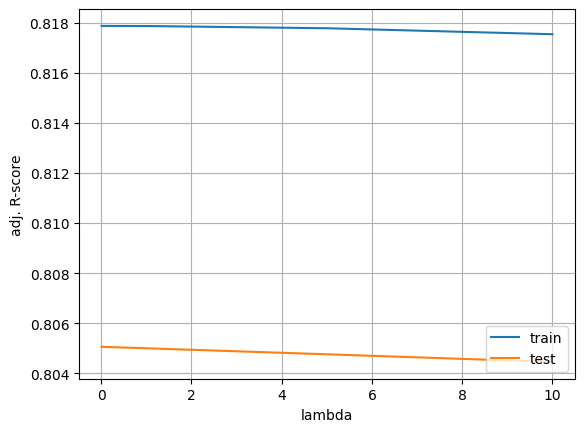

In [ ]:
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

0 value of alpha is optimum

In [ ]:
model=LinearRegression()
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
model.fit(X_train_scaled,y_train)
print(model.coef_)
print(model.score(scaler.fit_transform(X_test),y_test))

[0.02667052 0.01822633 0.00293995 0.001788   0.0158655  0.06758106
 0.01194049]
0.8160515841132164


# Summary

In summary, CGPA, GRE Score, and TOEFL Score are the most influential factors in predicting graduate admissions, with CGPA having the strongest impact. Features like SOP, LOR, and University Rating play a smaller role. This analysis can guide Jamboree in focusing on these critical areas when advising students and developing admission prediction models.